# Izumo
NLP Primitives

## 1. Install and import prerequisites

In [1]:
!pip install 'pyizumo[dp]'
!pip install pandas conll-df deplacy graphviz

  Preparing metadata (setup.py) ... done
  Created wheel for conll-df: filename=conll_df-0.0.4-py2.py3-none-any.whl size=3979 sha256=5f7e71becb8156c538ae12454e78ee0fbcfd506059e29ebc7b507ce74716db7e
  Stored in directory: /tmp/1000730000/.cache/pip/wheels/4b/ff/82/db55782146ec427ff372748f9858d414da8cc1034a64940740
Successfully built conll-df


In [2]:
import pyizumo
import datetime
import pandas as pd
import json
from pprint import pprint
from IPython.display import JSON
from conll_df import conll_df
import deplacy
import graphviz

In [3]:
print(datetime.datetime.now(datetime.timezone.utc))

2023-07-10 07:21:48.251480+00:00


## 2. Load configurations for the input language

In [4]:
language = 'en'
nlp = pyizumo.load(language)

## 3. Analyze the input text

In [6]:
text = 'This is also the only region in Alaska in which the average daytime high temperature is above freezing during the winter months.'
print(text)

This is also the only region in Alaska in which the average daytime high temperature is above freezing during the winter months.


In [7]:
doc = nlp(text)

## 4. Get outputs

Iterate over sentences and tokens using API

In [11]:
list(doc.paragraphs)

[This is also the only region in Alaska in which the average daytime high temperature is above freezing during the winter months.]

In [7]:
print(''.join([
    h.ljust(8) for h in ['p_i', 's_i', 't_i', 'text', 'lemma', 'pos', 'rel', 'head']
]))
for paragraph in doc.paragraphs:
    for sentence in paragraph:
        for token in sentence:
            print(''.join([
                str(e).ljust(8) for e in [
                    paragraph.index, sentence.index, token.index,
                    token, token.lemma, token.pos, token.relation, token.parent,
                ]
            ]))

p_i     s_i     t_i     text    lemma   pos     rel     head    
0       0       0       This    this    PRON    nsubj   region  
0       0       1       is      be      AUX     cop     region  
0       0       2       also    also    ADV     advmod  region  
0       0       3       the     the     DET     det     region  
0       0       4       only    only    ADJ     amod    region  
0       0       5       region  region  NOUN    root    None    
0       0       6       in      in      ADP     case    Alaska  
0       0       7       Alaska  None    PROPN   nmod    region  
0       0       8       in      in      SCONJ   case    which   
0       0       9       which   which   PRON    obl     freezing
0       0       10      the     the     DET     det     temperature
0       0       11      average average ADJ     amod    temperature
0       0       12      daytime daytime NOUN    compoundtemperature
0       0       13      high    high    ADJ     amod    temperature
0       0    

### 4-1. Export results to CSV

In [12]:
izm_csv = doc.to_conllu()
print(izm_csv)

# text = This is also the only region in Alaska in which the average daytime high temperature is above freezing during the winter months.
1	This	this	PRON	DT	Number=Sing|PronType=Dem	6	nsubj	_	_
2	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	6	cop	_	_
3	also	also	ADV	RB	_	6	advmod	_	_
4	the	the	DET	DT	Definite=Def|PronType=Art	6	det	_	_
5	only	only	ADJ	JJ	Degree=Pos	6	amod	_	_
6	region	region	NOUN	NN	Number=Sing	0	root	_	_
7	in	in	ADP	IN	_	8	case	_	_
8	Alaska	Alaska	PROPN	NNP	Number=Sing	6	nmod	_	_
9	in	in	SCONJ	IN	_	10	case	_	_
10	which	which	PRON	WDT	PronType=Rel	18	obl	_	_
11	the	the	DET	DT	Definite=Def|PronType=Art	15	det	_	_
12	average	average	ADJ	JJ	Degree=Pos	15	amod	_	_
13	daytime	daytime	NOUN	NN	Number=Sing	15	compound	_	_
14	high	high	ADJ	JJ	Degree=Pos	15	amod	_	_
15	temperature	temperature	NOUN	NN	Number=Sing	18	nsubj	_	_
16	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	18	aux	_	_
17	above	above	ADV	RB	_	18	advmod	_	_
18	freezing	

In [14]:
izm_csv_fname = language + '.conllu'
with open(izm_csv_fname, mode='w') as f:
    f.write(izm_csv)
print('Saved CSV to', izm_csv_fname)

Saved CSV to en.conllu


### 4-2. Export results to Pandas DataFrame

In [19]:
df = conll_df(izm_csv_fname, file_index=False)
df = df.rename(columns={'w': 'FORM', 'l': 'LEMMA', 'p': 'UPOS', 'n': 'XPOS', 'g': 'HEAD', 'f': 'DEPREL', 'e': 'DEPS', 'c': 'MISC'})
df.head(100)

FORM        LEMMA   UPOS XPOS  HEAD    DEPREL           MISC
s i                                                                      
1 1          This         this   PRON   DT     6     nsubj              _
  2            is           be    AUX  VBZ     6       cop              _
  3          also         also    ADV   RB     6    advmod              _
  4           the          the    DET   DT     6       det              _
  5          only         only    ADJ   JJ     6      amod              _
  6        region       region   NOUN   NN     0      root              _
  7            in           in    ADP   IN     8      case              _
  8        Alaska       Alaska  PROPN  NNP     6      nmod              _
  9            in           in  SCONJ   IN    10      case              _
  10        which        which   PRON  WDT    18       obl              _
  11          the          the    DET   DT    15       det              _
  12      average      average    ADJ   JJ    15      amod              _
  13      daytime      daytime   NOUN   NN    15  compound              _
  14         high         high    ADJ   JJ    15      amod              _
  15  temperature  temperature   NOUN   NN    18     nsubj              _
  16           is           be    AUX  VBZ    18       aux              _
  17        above        above    ADV   RB    18    advmod              _
  18     freezing       freeze   VERB  VBG     6       acl              _
  19       during       during    ADP   IN    22      case              _
  20          the          the    DET   DT    22       det              _
  21       winter       winter   NOUN   NN    22  compound              _
  22       months        month   NOUN  NNS    18       obl  SpaceAfter=No
  23            .            .  PUNCT    .     6     punct              _

### 4-3. Export detailed results to JSON

In [11]:
izm_json = doc.to_json()
display(JSON(izm_json))

<IPython.core.display.JSON object>

In [12]:
izm_json_fname = language + '.json'
with open(izm_json_fname, mode='w') as f:
    json.dump(izm_json, f, indent=4)
print('Saved JSON to', izm_json_fname)

Saved JSON to en.json


## 5. Visualize outputs

### 5.1 Visualize results using text

```
• nsubj: Nominal subject (e.g., "This")
• cop: Copula (e.g., "is")
• advmod: Adverbial modifier (e.g., "also")
• det: Determiner (e.g., "the")
• amod: Adjectival modifier (e.g., "only", "average")
• acl: Clausal modifier of noun (e.g., "freezing")
• case: Case marking (e.g., "in", "during")
• obl: Oblique nominal (e.g., "Alaska", "months")
• compound: Compound (e.g., "daytime", "high")
• aux: Auxiliary (e.g., "is")
• punct: Punctuation (e.g., ".")
```

In [13]:
deplacy.render(izm_csv)

This        PRON  <══════════════════════════╗   nsubj
is          AUX   <════════════════════════╗ ║   cop
also        ADV   <══════════════════════╗ ║ ║   advmod
the         DET   <════════════════════╗ ║ ║ ║   det
only        ADJ   <══════════════════╗ ║ ║ ║ ║   amod
region      NOUN  ═══╗═════════════╗═╝═╝═╝═╝═╝═╗ root
in          ADP   <╗ ║             ║           ║ case
Alaska      PROPN ═╝<╝             ║           ║ nmod
in          SCONJ <╗               ║           ║ case
which       PRON  ═╝<════════════╗ ║           ║ obl
the         DET   <══════╗       ║ ║           ║ det
average     ADJ   <════╗ ║       ║ ║           ║ amod
daytime     NOUN  <══╗ ║ ║       ║ ║           ║ compound
high        ADJ   <╗ ║ ║ ║       ║ ║           ║ amod
temperature NOUN  ═╝═╝═╝═╝<════╗ ║ ║           ║ nsubj
is          AUX   <══════════╗ ║ ║ ║           ║ aux
above       ADV   <════════╗ ║ ║ ║ ║           ║ advmod
freezing    VERB  ═══════╗═╝═╝═╝═╝<╝           ║ acl
during      ADP   <════╗

### 5.2 Visualize results using Graphviz

Note: This requires [Graphviz](https://www.graphviz.org/) in your path. For example on RedHat, run the following command to install it:
```sh
$ sudo yum install graphviz
```

Check if Graphviz exsits in the path.

In [20]:
!dot -V

dot - graphviz version 2.40.1 (20161225.0304)


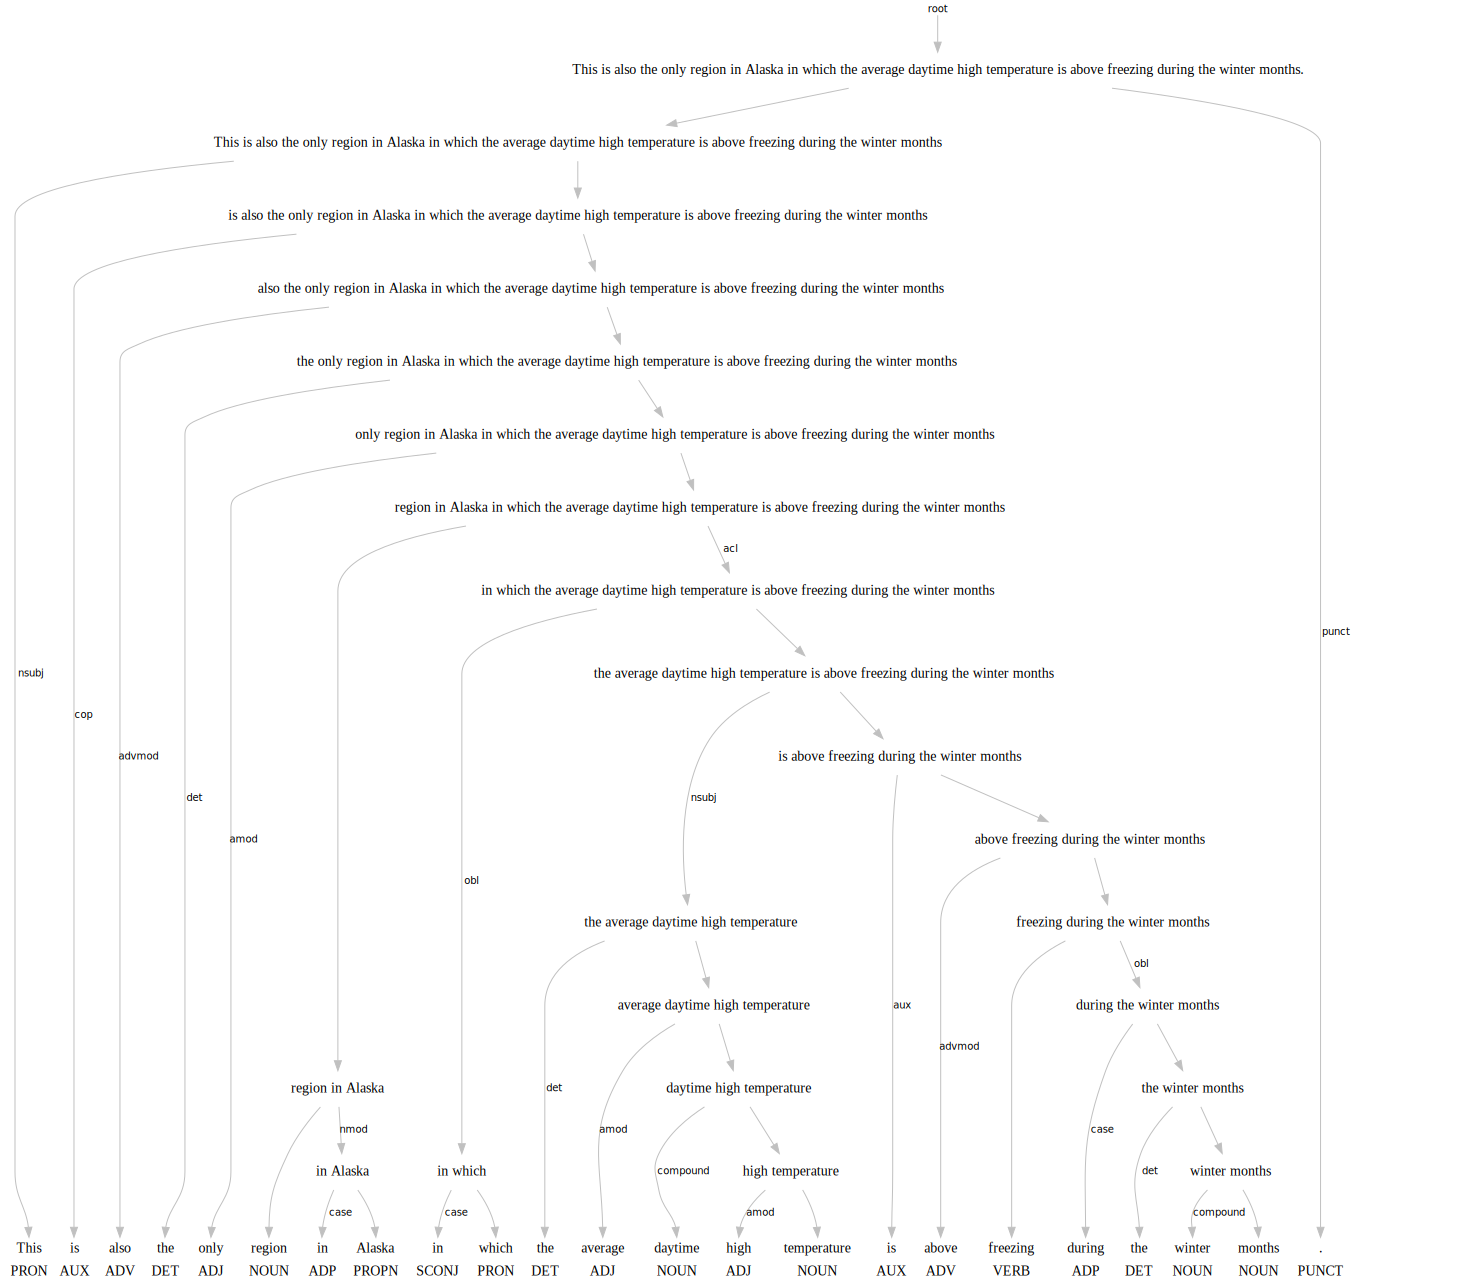

In [21]:
gv = graphviz.Source(deplacy.dot(izm_csv))
display(gv)

In [16]:
izm_png_file = language + '.png'
gv.render(outfile = izm_png_file, format = 'png')
print('Saved PNG to', izm_png_file)

Saved PNG to en.png


———————————————————

In [17]:
print(datetime.datetime.now(datetime.timezone.utc))

2023-07-10 07:21:54.025128+00:00
